<a href="https://colab.research.google.com/github/NataliaKolesnik/IT_volunteer/blob/master/%D0%9F%D1%80%D0%B5%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81%D0%B8%D0%BD%D0%B3_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача № 2. Бухгалтерска отчетность НКО (раздел 1 - подготовка данных)

***Работу выполнили Команда № 1 "Researchers"***
* Капитан команды: `Колесник Наталья`
* Члены команды:   `Григорьева Людмила, Ямилова Алсу, Ковалева Надежда, Фараджзаде Руслан`

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

pd.set_option('display.max_columns', 165)
# отключаем экспоненциальную запись
pd.set_option('display.float_format', lambda x: '%.2f' % x)

FONT_TITLE = 20
FONT_LABEL = 15

In [ ]:
# загрузим московские компании
data_moscow = pd.read_excel("data/Выборка компаний Москва.xlsx", sheet_name="report", skiprows=3)
data_moscow.sample(6)

,№,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2019, Среднесписочная численность работников","2020, Среднесписочная численность работников","2021, Среднесписочная численность работников","2017, Доходы, RUB","2018, Доходы, RUB","2019, Доходы, RUB","2020, Доходы, RUB","2021, Доходы, RUB","2017, Расходы, RUB","2018, Расходы, RUB","2019, Расходы, RUB","2020, Расходы, RUB","2021, Расходы, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2019, Дебиторская задолженность, RUB","2020, Дебиторская задолженность, RUB","2021, Дебиторская задолженность, RUB","2017, Денежные средства и денежные эквиваленты, RUB","2018, Денежные средства и денежные эквиваленты, RUB","2019, Денежные средства и денежные эквиваленты, RUB","2020, Денежные средства и денежные эквиваленты, RUB","2021, Денежные средства и денежные эквиваленты, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2019, Капитал и резервы, RUB","2020, Капитал и резервы, RUB","2021, Капитал и резервы, RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2019, Заёмные средства (краткосрочные), RUB","2020, Заёмные средства (краткосрочные), RUB","2021, Заёмные средства (краткосрочные), RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2019, Кредиторская задолженность, RUB","2020, Кредиторская задолженность, RUB","2021, Кредиторская задолженность, RUB","2017, Пассивы всего, RUB","2018, Пассивы всего, RUB","2019, Пассивы всего, RUB","2020, Пассивы всего, RUB","2021, Пассивы всего, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2020, Себестоимость продаж, RUB","2021, Себестоимость продаж, RUB","2017, Валовая прибыль (убыток), RUB","2018, Валовая прибыль (убыток), RUB","2019, Валовая прибыль (убыток), RUB","2020, Валовая прибыль (убыток), RUB","2021, Валовая прибыль (убыток), RUB","2017, Коммерческие расходы, RUB","2018, Коммерческие расходы, RUB","2019, Коммерческие расходы, RUB","2020, Коммерческие расходы, RUB","2021, Коммерческие расходы, RUB","2017, Управленческие расходы, RUB","2018, Управленческие расходы, RUB","2019, Управленческие расходы, RUB","2020, Управленческие расходы, RUB","2021, Управленческие расходы, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB","2020, Прибыль (убыток) от продажи, RUB","2021, Прибыль (убыток) от продажи, RUB","2017, Доходы от участия в других организациях, RUB","2018, Доходы от участия в других организациях, RUB","2019, Доходы от участия в других организациях, RUB","2020, Доходы от участия в других организациях, RUB","2021, Доходы от участия в других организациях, RUB","2017, Проценты к получению, RUB","2018, Проценты к получению, RUB","2019, Проценты к получению, RUB","2020, Проценты к получению, RUB","2021, Проценты к получению, RUB","2017, Проценты к уплате, RUB","2018, Проценты к уплате, RUB","2019, Проценты к уплате, RUB","2020, Проценты к уплате, RUB","2021, Проценты к уплате, RUB","2017, Прочие доходы, RUB","2018, Прочие доходы, RUB","2019, Прочие доходы, RUB","2020, Прочие доходы, RUB","2021, Прочие доходы, RUB","2017, Прочие расходы, RUB","2018, Прочие расходы, RUB","2019, Прочие расходы, RUB","2020, Прочие расходы, RUB","2021, Прочие расходы, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB","2017, Текущий налог на прибыль, RUB","2018, Текущий налог

In [ ]:
# загрузим остальные компании за исключением Москвы
data_region = pd.read_excel("data/Организации кроме Москвы.xlsx", sheet_name="report", skiprows=3)
data_region.sample(6)

,№,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2019, Среднесписочная численность работников","2020, Среднесписочная численность работников","2021, Среднесписочная численность работников","2017, Доходы, RUB","2018, Доходы, RUB","2019, Доходы, RUB","2020, Доходы, RUB","2021, Доходы, RUB","2017, Расходы, RUB","2018, Расходы, RUB","2019, Расходы, RUB","2020, Расходы, RUB","2021, Расходы, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2019, Дебиторская задолженность, RUB","2020, Дебиторская задолженность, RUB","2021, Дебиторская задолженность, RUB","2017, Денежные средства и денежные эквиваленты, RUB","2018, Денежные средства и денежные эквиваленты, RUB","2019, Денежные средства и денежные эквиваленты, RUB","2020, Денежные средства и денежные эквиваленты, RUB","2021, Денежные средства и денежные эквиваленты, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2019, Капитал и резервы, RUB","2020, Капитал и резервы, RUB","2021, Капитал и резервы, RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2019, Заёмные средства (краткосрочные), RUB","2020, Заёмные средства (краткосрочные), RUB","2021, Заёмные средства (краткосрочные), RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2019, Кредиторская задолженность, RUB","2020, Кредиторская задолженность, RUB","2021, Кредиторская задолженность, RUB","2017, Пассивы всего, RUB","2018, Пассивы всего, RUB","2019, Пассивы всего, RUB","2020, Пассивы всего, RUB","2021, Пассивы всего, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2020, Себестоимость продаж, RUB","2021, Себестоимость продаж, RUB","2017, Валовая прибыль (убыток), RUB","2018, Валовая прибыль (убыток), RUB","2019, Валовая прибыль (убыток), RUB","2020, Валовая прибыль (убыток), RUB","2021, Валовая прибыль (убыток), RUB","2017, Коммерческие расходы, RUB","2018, Коммерческие расходы, RUB","2019, Коммерческие расходы, RUB","2020, Коммерческие расходы, RUB","2021, Коммерческие расходы, RUB","2017, Управленческие расходы, RUB","2018, Управленческие расходы, RUB","2019, Управленческие расходы, RUB","2020, Управленческие расходы, RUB","2021, Управленческие расходы, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB","2020, Прибыль (убыток) от продажи, RUB","2021, Прибыль (убыток) от продажи, RUB","2017, Доходы от участия в других организациях, RUB","2018, Доходы от участия в других организациях, RUB","2019, Доходы от участия в других организациях, RUB","2020, Доходы от участия в других организациях, RUB","2021, Доходы от участия в других организациях, RUB","2017, Проценты к получению, RUB","2018, Проценты к получению, RUB","2019, Проценты к получению, RUB","2020, Проценты к получению, RUB","2021, Проценты к получению, RUB","2017, Проценты к уплате, RUB","2018, Проценты к уплате, RUB","2019, Проценты к уплате, RUB","2020, Проценты к уплате, RUB","2021, Проценты к уплате, RUB","2017, Прочие доходы, RUB","2018, Прочие доходы, RUB","2019, Прочие доходы, RUB","2020, Прочие доходы, RUB","2021, Прочие доходы, RUB","2017, Прочие расходы, RUB","2018, Прочие расходы, RUB","2019, Прочие расходы, RUB","2020, Прочие расходы, RUB","2021, Прочие расходы, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB","2017, Текущий налог на прибыль, RUB","2018, Текущий налог

In [ ]:
# преобразуем столбец с датой регистрации по компаниям в Москве к виду даты регистрации по региональным компаниям
data_moscow["Дата регистрации"] = pd.to_datetime(pd.to_datetime(
    data_moscow["Дата регистрации"]).apply(lambda x: x.date()))
data_moscow["Дата регистрации"]

0      2016-05-24
1      2015-01-23
2      2016-04-28
3      2019-08-13
4      2021-10-06
          ...    
3642   2014-04-21
3643   1998-09-04
3644   2017-06-09
3645   1999-12-06
3646   2022-04-20
Name: Дата регистрации, Length: 3647, dtype: datetime64[ns]

In [ ]:
data_moscow.info(), data_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3647 entries, 0 to 3646
Columns: 162 entries, № to 2021, Остаток средств на конец отчетного года, RUB
dtypes: datetime64[ns](1), float64(151), int64(3), object(7)
memory usage: 4.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7525 entries, 0 to 7524
Columns: 162 entries, № to 2021, Остаток средств на конец отчетного года, RUB
dtypes: datetime64[ns](1), float64(151), int64(3), object(7)
memory usage: 9.3+ MB


(None, None)

In [ ]:
# объединим компании в один датафрейм
data = data_moscow.append(data_region)
data.sample(6)

,№,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2019, Среднесписочная численность работников","2020, Среднесписочная численность работников","2021, Среднесписочная численность работников","2017, Доходы, RUB","2018, Доходы, RUB","2019, Доходы, RUB","2020, Доходы, RUB","2021, Доходы, RUB","2017, Расходы, RUB","2018, Расходы, RUB","2019, Расходы, RUB","2020, Расходы, RUB","2021, Расходы, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2019, Дебиторская задолженность, RUB","2020, Дебиторская задолженность, RUB","2021, Дебиторская задолженность, RUB","2017, Денежные средства и денежные эквиваленты, RUB","2018, Денежные средства и денежные эквиваленты, RUB","2019, Денежные средства и денежные эквиваленты, RUB","2020, Денежные средства и денежные эквиваленты, RUB","2021, Денежные средства и денежные эквиваленты, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2019, Капитал и резервы, RUB","2020, Капитал и резервы, RUB","2021, Капитал и резервы, RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2019, Заёмные средства (краткосрочные), RUB","2020, Заёмные средства (краткосрочные), RUB","2021, Заёмные средства (краткосрочные), RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2019, Кредиторская задолженность, RUB","2020, Кредиторская задолженность, RUB","2021, Кредиторская задолженность, RUB","2017, Пассивы всего, RUB","2018, Пассивы всего, RUB","2019, Пассивы всего, RUB","2020, Пассивы всего, RUB","2021, Пассивы всего, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2020, Себестоимость продаж, RUB","2021, Себестоимость продаж, RUB","2017, Валовая прибыль (убыток), RUB","2018, Валовая прибыль (убыток), RUB","2019, Валовая прибыль (убыток), RUB","2020, Валовая прибыль (убыток), RUB","2021, Валовая прибыль (убыток), RUB","2017, Коммерческие расходы, RUB","2018, Коммерческие расходы, RUB","2019, Коммерческие расходы, RUB","2020, Коммерческие расходы, RUB","2021, Коммерческие расходы, RUB","2017, Управленческие расходы, RUB","2018, Управленческие расходы, RUB","2019, Управленческие расходы, RUB","2020, Управленческие расходы, RUB","2021, Управленческие расходы, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB","2020, Прибыль (убыток) от продажи, RUB","2021, Прибыль (убыток) от продажи, RUB","2017, Доходы от участия в других организациях, RUB","2018, Доходы от участия в других организациях, RUB","2019, Доходы от участия в других организациях, RUB","2020, Доходы от участия в других организациях, RUB","2021, Доходы от участия в других организациях, RUB","2017, Проценты к получению, RUB","2018, Проценты к получению, RUB","2019, Проценты к получению, RUB","2020, Проценты к получению, RUB","2021, Проценты к получению, RUB","2017, Проценты к уплате, RUB","2018, Проценты к уплате, RUB","2019, Проценты к уплате, RUB","2020, Проценты к уплате, RUB","2021, Проценты к уплате, RUB","2017, Прочие доходы, RUB","2018, Прочие доходы, RUB","2019, Прочие доходы, RUB","2020, Прочие доходы, RUB","2021, Прочие доходы, RUB","2017, Прочие расходы, RUB","2018, Прочие расходы, RUB","2019, Прочие расходы, RUB","2020, Прочие расходы, RUB","2021, Прочие расходы, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB","2017, Текущий налог на прибыль, RUB","2018, Текущий налог

In [ ]:
# Удалим колонку №
data = data.drop('№', axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11172 entries, 0 to 7524
Columns: 161 entries, Наименование to 2021, Остаток средств на конец отчетного года, RUB
dtypes: datetime64[ns](1), float64(151), int64(2), object(7)
memory usage: 13.8+ MB


## Предоставление отчета организациями

На вопрос сколько и какие организации действительно работают, а не существуют на "бумаге", будет ответ сколько организаций предоставили отчеты

,Количество компаний,% компаний
Новая организация,223,2.00
Отчет не сдан,4111,36.80
Отчет сдан,6838,61.21


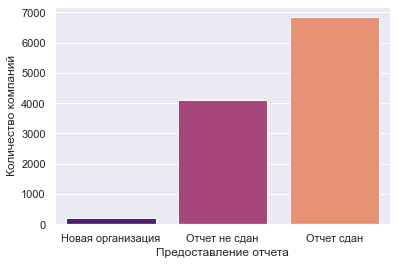

In [ ]:
df_fig1 = data[data["Дата регистрации"] > "2022-01-01"].copy()
df_fig1["report"] = "Новая организация"

columns_name = list(data.columns)
col = columns_name[11:]
data1 = data[data["Дата регистрации"] < "2022-01-01"].copy()
df = data1[col]
mask = df.isna().all(axis=1)
df_fig2 = data1[mask].copy()
df_fig2["report"] = "Отчет не сдан"

df_fig = df_fig1.append(df_fig2)

data2 = data1[~mask]
df_fig3 = data2[data2["Дата регистрации"] < "2022-01-01"].copy()
df_fig3["report"] = "Отчет сдан"

df_fig = df_fig.append(df_fig3)

d = {"Количество компаний": df_fig["report"].value_counts(
), "% компаний": df_fig["report"].value_counts(normalize=True)*100}

display(pd.DataFrame(d, index=df_fig["report"].unique()))
sns.countplot(data=df_fig, x='report', palette='magma')
plt.xlabel("Предоставление отчета")
plt.ylabel("Количество компаний")

Очистим данные от организаций, не предоставивших отчетность. Такие организации у нас 2-х видов:
1. Организации, зарегистрированные в 2022, а значит отчетность по ним будет только в 2023 за 2022
2. Организации, которые давно зарегистрировались, но отчетность не предоставляют

In [ ]:
# 1-й тип органиазций
data[data["Дата регистрации"] > "2022-01-01"]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2019, Среднесписочная численность работников","2020, Среднесписочная численность работников","2021, Среднесписочная численность работников","2017, Доходы, RUB","2018, Доходы, RUB","2019, Доходы, RUB","2020, Доходы, RUB","2021, Доходы, RUB","2017, Расходы, RUB","2018, Расходы, RUB","2019, Расходы, RUB","2020, Расходы, RUB","2021, Расходы, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2019, Дебиторская задолженность, RUB","2020, Дебиторская задолженность, RUB","2021, Дебиторская задолженность, RUB","2017, Денежные средства и денежные эквиваленты, RUB","2018, Денежные средства и денежные эквиваленты, RUB","2019, Денежные средства и денежные эквиваленты, RUB","2020, Денежные средства и денежные эквиваленты, RUB","2021, Денежные средства и денежные эквиваленты, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2019, Капитал и резервы, RUB","2020, Капитал и резервы, RUB","2021, Капитал и резервы, RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2019, Заёмные средства (краткосрочные), RUB","2020, Заёмные средства (краткосрочные), RUB","2021, Заёмные средства (краткосрочные), RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2019, Кредиторская задолженность, RUB","2020, Кредиторская задолженность, RUB","2021, Кредиторская задолженность, RUB","2017, Пассивы всего, RUB","2018, Пассивы всего, RUB","2019, Пассивы всего, RUB","2020, Пассивы всего, RUB","2021, Пассивы всего, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2020, Себестоимость продаж, RUB","2021, Себестоимость продаж, RUB","2017, Валовая прибыль (убыток), RUB","2018, Валовая прибыль (убыток), RUB","2019, Валовая прибыль (убыток), RUB","2020, Валовая прибыль (убыток), RUB","2021, Валовая прибыль (убыток), RUB","2017, Коммерческие расходы, RUB","2018, Коммерческие расходы, RUB","2019, Коммерческие расходы, RUB","2020, Коммерческие расходы, RUB","2021, Коммерческие расходы, RUB","2017, Управленческие расходы, RUB","2018, Управленческие расходы, RUB","2019, Управленческие расходы, RUB","2020, Управленческие расходы, RUB","2021, Управленческие расходы, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB","2020, Прибыль (убыток) от продажи, RUB","2021, Прибыль (убыток) от продажи, RUB","2017, Доходы от участия в других организациях, RUB","2018, Доходы от участия в других организациях, RUB","2019, Доходы от участия в других организациях, RUB","2020, Доходы от участия в других организациях, RUB","2021, Доходы от участия в других организациях, RUB","2017, Проценты к получению, RUB","2018, Проценты к получению, RUB","2019, Проценты к получению, RUB","2020, Проценты к получению, RUB","2021, Проценты к получению, RUB","2017, Проценты к уплате, RUB","2018, Проценты к уплате, RUB","2019, Проценты к уплате, RUB","2020, Проценты к уплате, RUB","2021, Проценты к уплате, RUB","2017, Прочие доходы, RUB","2018, Прочие доходы, RUB","2019, Прочие доходы, RUB","2020, Прочие доходы, RUB","2021, Прочие доходы, RUB","2017, Прочие расходы, RUB","2018, Прочие расходы, RUB","2019, Прочие расходы, RUB","2020, Прочие расходы, RUB","2021, Прочие расходы, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB","2017, Текущий налог на прибыль, RUB","2018, Текущий налог н

223 организаций зарегистрированы в 2022, а значит на данный момент данных отчетности сейчас по ним нет, будет только в 2023 за 2022 год. Поэтому удалим эти организации из анализа

In [ ]:
data = data[data["Дата регистрации"] < "2022-01-01"]
data.sample(3)

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2019, Среднесписочная численность работников","2020, Среднесписочная численность работников","2021, Среднесписочная численность работников","2017, Доходы, RUB","2018, Доходы, RUB","2019, Доходы, RUB","2020, Доходы, RUB","2021, Доходы, RUB","2017, Расходы, RUB","2018, Расходы, RUB","2019, Расходы, RUB","2020, Расходы, RUB","2021, Расходы, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2019, Дебиторская задолженность, RUB","2020, Дебиторская задолженность, RUB","2021, Дебиторская задолженность, RUB","2017, Денежные средства и денежные эквиваленты, RUB","2018, Денежные средства и денежные эквиваленты, RUB","2019, Денежные средства и денежные эквиваленты, RUB","2020, Денежные средства и денежные эквиваленты, RUB","2021, Денежные средства и денежные эквиваленты, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2019, Капитал и резервы, RUB","2020, Капитал и резервы, RUB","2021, Капитал и резервы, RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2019, Заёмные средства (краткосрочные), RUB","2020, Заёмные средства (краткосрочные), RUB","2021, Заёмные средства (краткосрочные), RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2019, Кредиторская задолженность, RUB","2020, Кредиторская задолженность, RUB","2021, Кредиторская задолженность, RUB","2017, Пассивы всего, RUB","2018, Пассивы всего, RUB","2019, Пассивы всего, RUB","2020, Пассивы всего, RUB","2021, Пассивы всего, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2020, Себестоимость продаж, RUB","2021, Себестоимость продаж, RUB","2017, Валовая прибыль (убыток), RUB","2018, Валовая прибыль (убыток), RUB","2019, Валовая прибыль (убыток), RUB","2020, Валовая прибыль (убыток), RUB","2021, Валовая прибыль (убыток), RUB","2017, Коммерческие расходы, RUB","2018, Коммерческие расходы, RUB","2019, Коммерческие расходы, RUB","2020, Коммерческие расходы, RUB","2021, Коммерческие расходы, RUB","2017, Управленческие расходы, RUB","2018, Управленческие расходы, RUB","2019, Управленческие расходы, RUB","2020, Управленческие расходы, RUB","2021, Управленческие расходы, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB","2020, Прибыль (убыток) от продажи, RUB","2021, Прибыль (убыток) от продажи, RUB","2017, Доходы от участия в других организациях, RUB","2018, Доходы от участия в других организациях, RUB","2019, Доходы от участия в других организациях, RUB","2020, Доходы от участия в других организациях, RUB","2021, Доходы от участия в других организациях, RUB","2017, Проценты к получению, RUB","2018, Проценты к получению, RUB","2019, Проценты к получению, RUB","2020, Проценты к получению, RUB","2021, Проценты к получению, RUB","2017, Проценты к уплате, RUB","2018, Проценты к уплате, RUB","2019, Проценты к уплате, RUB","2020, Проценты к уплате, RUB","2021, Проценты к уплате, RUB","2017, Прочие доходы, RUB","2018, Прочие доходы, RUB","2019, Прочие доходы, RUB","2020, Прочие доходы, RUB","2021, Прочие доходы, RUB","2017, Прочие расходы, RUB","2018, Прочие расходы, RUB","2019, Прочие расходы, RUB","2020, Прочие расходы, RUB","2021, Прочие расходы, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB","2017, Текущий налог на прибыль, RUB","2018, Текущий налог н

In [ ]:
# 2-й тип органиазций
columns_name = list(data.columns)
col = columns_name[11:]
df = data[col]
data[df.isna().all(axis=1)]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2019, Среднесписочная численность работников","2020, Среднесписочная численность работников","2021, Среднесписочная численность работников","2017, Доходы, RUB","2018, Доходы, RUB","2019, Доходы, RUB","2020, Доходы, RUB","2021, Доходы, RUB","2017, Расходы, RUB","2018, Расходы, RUB","2019, Расходы, RUB","2020, Расходы, RUB","2021, Расходы, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2019, Дебиторская задолженность, RUB","2020, Дебиторская задолженность, RUB","2021, Дебиторская задолженность, RUB","2017, Денежные средства и денежные эквиваленты, RUB","2018, Денежные средства и денежные эквиваленты, RUB","2019, Денежные средства и денежные эквиваленты, RUB","2020, Денежные средства и денежные эквиваленты, RUB","2021, Денежные средства и денежные эквиваленты, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2019, Капитал и резервы, RUB","2020, Капитал и резервы, RUB","2021, Капитал и резервы, RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2019, Заёмные средства (краткосрочные), RUB","2020, Заёмные средства (краткосрочные), RUB","2021, Заёмные средства (краткосрочные), RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2019, Кредиторская задолженность, RUB","2020, Кредиторская задолженность, RUB","2021, Кредиторская задолженность, RUB","2017, Пассивы всего, RUB","2018, Пассивы всего, RUB","2019, Пассивы всего, RUB","2020, Пассивы всего, RUB","2021, Пассивы всего, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2020, Себестоимость продаж, RUB","2021, Себестоимость продаж, RUB","2017, Валовая прибыль (убыток), RUB","2018, Валовая прибыль (убыток), RUB","2019, Валовая прибыль (убыток), RUB","2020, Валовая прибыль (убыток), RUB","2021, Валовая прибыль (убыток), RUB","2017, Коммерческие расходы, RUB","2018, Коммерческие расходы, RUB","2019, Коммерческие расходы, RUB","2020, Коммерческие расходы, RUB","2021, Коммерческие расходы, RUB","2017, Управленческие расходы, RUB","2018, Управленческие расходы, RUB","2019, Управленческие расходы, RUB","2020, Управленческие расходы, RUB","2021, Управленческие расходы, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB","2020, Прибыль (убыток) от продажи, RUB","2021, Прибыль (убыток) от продажи, RUB","2017, Доходы от участия в других организациях, RUB","2018, Доходы от участия в других организациях, RUB","2019, Доходы от участия в других организациях, RUB","2020, Доходы от участия в других организациях, RUB","2021, Доходы от участия в других организациях, RUB","2017, Проценты к получению, RUB","2018, Проценты к получению, RUB","2019, Проценты к получению, RUB","2020, Проценты к получению, RUB","2021, Проценты к получению, RUB","2017, Проценты к уплате, RUB","2018, Проценты к уплате, RUB","2019, Проценты к уплате, RUB","2020, Проценты к уплате, RUB","2021, Проценты к уплате, RUB","2017, Прочие доходы, RUB","2018, Прочие доходы, RUB","2019, Прочие доходы, RUB","2020, Прочие доходы, RUB","2021, Прочие доходы, RUB","2017, Прочие расходы, RUB","2018, Прочие расходы, RUB","2019, Прочие расходы, RUB","2020, Прочие расходы, RUB","2021, Прочие расходы, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB","2017, Текущий налог на прибыль, RUB","2018, Текущий налог н

В данных 4111 организация, не представляющая отчетность в госорганы. Удалим эти организации из анализа

In [ ]:
mask = df.isna().all(axis=1)
data = data[~mask]
data

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2019, Среднесписочная численность работников","2020, Среднесписочная численность работников","2021, Среднесписочная численность работников","2017, Доходы, RUB","2018, Доходы, RUB","2019, Доходы, RUB","2020, Доходы, RUB","2021, Доходы, RUB","2017, Расходы, RUB","2018, Расходы, RUB","2019, Расходы, RUB","2020, Расходы, RUB","2021, Расходы, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2019, Дебиторская задолженность, RUB","2020, Дебиторская задолженность, RUB","2021, Дебиторская задолженность, RUB","2017, Денежные средства и денежные эквиваленты, RUB","2018, Денежные средства и денежные эквиваленты, RUB","2019, Денежные средства и денежные эквиваленты, RUB","2020, Денежные средства и денежные эквиваленты, RUB","2021, Денежные средства и денежные эквиваленты, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2019, Капитал и резервы, RUB","2020, Капитал и резервы, RUB","2021, Капитал и резервы, RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2019, Заёмные средства (краткосрочные), RUB","2020, Заёмные средства (краткосрочные), RUB","2021, Заёмные средства (краткосрочные), RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2019, Кредиторская задолженность, RUB","2020, Кредиторская задолженность, RUB","2021, Кредиторская задолженность, RUB","2017, Пассивы всего, RUB","2018, Пассивы всего, RUB","2019, Пассивы всего, RUB","2020, Пассивы всего, RUB","2021, Пассивы всего, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2020, Себестоимость продаж, RUB","2021, Себестоимость продаж, RUB","2017, Валовая прибыль (убыток), RUB","2018, Валовая прибыль (убыток), RUB","2019, Валовая прибыль (убыток), RUB","2020, Валовая прибыль (убыток), RUB","2021, Валовая прибыль (убыток), RUB","2017, Коммерческие расходы, RUB","2018, Коммерческие расходы, RUB","2019, Коммерческие расходы, RUB","2020, Коммерческие расходы, RUB","2021, Коммерческие расходы, RUB","2017, Управленческие расходы, RUB","2018, Управленческие расходы, RUB","2019, Управленческие расходы, RUB","2020, Управленческие расходы, RUB","2021, Управленческие расходы, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB","2020, Прибыль (убыток) от продажи, RUB","2021, Прибыль (убыток) от продажи, RUB","2017, Доходы от участия в других организациях, RUB","2018, Доходы от участия в других организациях, RUB","2019, Доходы от участия в других организациях, RUB","2020, Доходы от участия в других организациях, RUB","2021, Доходы от участия в других организациях, RUB","2017, Проценты к получению, RUB","2018, Проценты к получению, RUB","2019, Проценты к получению, RUB","2020, Проценты к получению, RUB","2021, Проценты к получению, RUB","2017, Проценты к уплате, RUB","2018, Проценты к уплате, RUB","2019, Проценты к уплате, RUB","2020, Проценты к уплате, RUB","2021, Проценты к уплате, RUB","2017, Прочие доходы, RUB","2018, Прочие доходы, RUB","2019, Прочие доходы, RUB","2020, Прочие доходы, RUB","2021, Прочие доходы, RUB","2017, Прочие расходы, RUB","2018, Прочие расходы, RUB","2019, Прочие расходы, RUB","2020, Прочие расходы, RUB","2021, Прочие расходы, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB","2017, Текущий налог на прибыль, RUB","2018, Текущий налог н

***В предоставленных данных у нас только 6838 компаний, подавших отчетность в госорганы и действительно работающие. В дальнейшем будет работать с данными этих компаний***

In [ ]:
data.reset_index(drop=True)

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2019, Среднесписочная численность работников","2020, Среднесписочная численность работников","2021, Среднесписочная численность работников","2017, Доходы, RUB","2018, Доходы, RUB","2019, Доходы, RUB","2020, Доходы, RUB","2021, Доходы, RUB","2017, Расходы, RUB","2018, Расходы, RUB","2019, Расходы, RUB","2020, Расходы, RUB","2021, Расходы, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2019, Дебиторская задолженность, RUB","2020, Дебиторская задолженность, RUB","2021, Дебиторская задолженность, RUB","2017, Денежные средства и денежные эквиваленты, RUB","2018, Денежные средства и денежные эквиваленты, RUB","2019, Денежные средства и денежные эквиваленты, RUB","2020, Денежные средства и денежные эквиваленты, RUB","2021, Денежные средства и денежные эквиваленты, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2019, Капитал и резервы, RUB","2020, Капитал и резервы, RUB","2021, Капитал и резервы, RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2019, Заёмные средства (краткосрочные), RUB","2020, Заёмные средства (краткосрочные), RUB","2021, Заёмные средства (краткосрочные), RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2019, Кредиторская задолженность, RUB","2020, Кредиторская задолженность, RUB","2021, Кредиторская задолженность, RUB","2017, Пассивы всего, RUB","2018, Пассивы всего, RUB","2019, Пассивы всего, RUB","2020, Пассивы всего, RUB","2021, Пассивы всего, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2020, Себестоимость продаж, RUB","2021, Себестоимость продаж, RUB","2017, Валовая прибыль (убыток), RUB","2018, Валовая прибыль (убыток), RUB","2019, Валовая прибыль (убыток), RUB","2020, Валовая прибыль (убыток), RUB","2021, Валовая прибыль (убыток), RUB","2017, Коммерческие расходы, RUB","2018, Коммерческие расходы, RUB","2019, Коммерческие расходы, RUB","2020, Коммерческие расходы, RUB","2021, Коммерческие расходы, RUB","2017, Управленческие расходы, RUB","2018, Управленческие расходы, RUB","2019, Управленческие расходы, RUB","2020, Управленческие расходы, RUB","2021, Управленческие расходы, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB","2020, Прибыль (убыток) от продажи, RUB","2021, Прибыль (убыток) от продажи, RUB","2017, Доходы от участия в других организациях, RUB","2018, Доходы от участия в других организациях, RUB","2019, Доходы от участия в других организациях, RUB","2020, Доходы от участия в других организациях, RUB","2021, Доходы от участия в других организациях, RUB","2017, Проценты к получению, RUB","2018, Проценты к получению, RUB","2019, Проценты к получению, RUB","2020, Проценты к получению, RUB","2021, Проценты к получению, RUB","2017, Проценты к уплате, RUB","2018, Проценты к уплате, RUB","2019, Проценты к уплате, RUB","2020, Проценты к уплате, RUB","2021, Проценты к уплате, RUB","2017, Прочие доходы, RUB","2018, Прочие доходы, RUB","2019, Прочие доходы, RUB","2020, Прочие доходы, RUB","2021, Прочие доходы, RUB","2017, Прочие расходы, RUB","2018, Прочие расходы, RUB","2019, Прочие расходы, RUB","2020, Прочие расходы, RUB","2021, Прочие расходы, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB","2017, Текущий налог на прибыль, RUB","2018, Текущий налог н

In [ ]:
# преобразуем из float в int данные по следующим признакам
data.loc[:, "Регистрационный номер"] = data["Регистрационный номер"].apply(int)
data.loc[:, "Код налогоплательщика"] = data["Код налогоплательщика"].apply(int)
data.loc[:, "Код ОКТМО"] = data["Код ОКТМО"].apply(int)

## Дата создания организации

In [ ]:
data["Дата регистрации"].min()

Timestamp('1986-06-28 00:00:00')

In [ ]:
# Сформируем новый признак - год регистрации
data.loc[:,'Год_регистрации'] = data['Дата регистрации'].apply(lambda d: d.year)

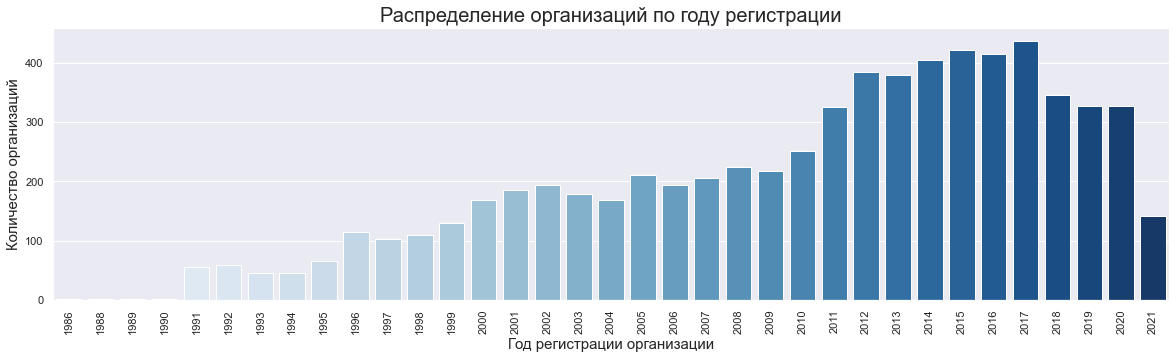

In [ ]:
plt.figure(figsize=(20,5))
plt.title('Распределение организаций по году регистрации', fontsize=FONT_TITLE)
sns.countplot(x=data['Год_регистрации'],  palette='Blues')
plt.ylabel('Количество организаций', fontsize=FONT_LABEL)
plt.xlabel('Год регистрации организации', fontsize=FONT_LABEL)
plt.xticks(rotation=90)
plt.show();

По графику видно, что резкий рост количества регистраций НКО был в 1996, 2000 и 2010-2012, 2017

## Регион регистрации

In [ ]:
d = {"Количество компаний": sorted(data["Регион регистрации"].value_counts(), reverse=True), "% компаний": sorted(
    data["Регион регистрации"].value_counts(normalize=True)*100, reverse=True)}
display(pd.DataFrame(
    d, index=data["Регион регистрации"].value_counts().index).transpose())
print(f'Количество регионов: {len(data["Регион регистрации"].value_counts())}')

,Москва,Санкт-Петербург,Московская область,Республика Татарстан,Свердловская область,Башкортостан (Республика),Новосибирская область,Красноярский край,Краснодарский край,Самарская область,Ростовская область,Иркутская область,Нижегородская область,Тюменская область,Омская область,Челябинская область,Пермский край,Кемеровская область,Волгоградская область,Алтайский край,Республика Крым,Удмуртская Республика,Воронежская область,Саратовская область,Ленинградская область,Ставропольский край,Тверская область,Калужская область,Дагестан (Республика),Пензенская область,Приморский край,Вологодская область,Калининградская область,Оренбургская область,Хабаровский край,Ярославская область,Карелия (Республика),Курская область,Владимирская область,Саха (Республика) (Якутия),Кировская область,Тульская область,Белгородская область,Рязанская область,Кабардино-Балкарская Республика,Томская область,Костромская область,Брянская область,Ивановская область,Бурятия (Республика),Чувашская Республика-Чувашия,Курганская область,Архангельская область,Севастополь,Астраханская область,Сахалинская область,Коми (Республика),Липецкая область,Хакасия (Республика),Ульяновская область,Орловская область,Псковская область,Мурманская область,Мордовия (Республика),Забайкальский край,Смоленская область,Алтай (Республика),Марий Эл (Республика),Амурская область,Тамбовская область,Новгородская область,Северная Осетия-Алания (Республика),Камчатский край,Калмыкия (Республика),Карачаево-Черкесская Республика,Ингушетия (Республика),Адыгея (Республика) (Адыгея),Чеченская Республика,Тыва (Республика),Магаданская область,Чукотский автономный округ,Еврейская автономная область,Байконур
Количество компаний,1852.00,564.00,309.00,219.00,180.00,179.00,151.00,148.00,146.00,146.00,142.00,139.00,136.00,129.00,122.00,116.00,99.00,75.00,75.00,72.00,69.00,68.00,67.00,63.00,61.00,59.00,51.00,49.00,49.00,48.00,47.00,45.00,45.00,45.00,44.00,41.00,39.00,38.00,37.00,36.00,36.00,34.00,34.00,32.00,31.00,31.00,29.00,29.00,28.00,27.00,27.00,26.00,25.00,24.00,24.00,24.00,24.00,23.00,22.00,22.00,21.00,20.00,18.00,18.00,18.00,18.00,18.00,17.00,16.00,15.00,15.00,15.00,14.00,12.00,10.00,9.00,9.00,6.00,6.00,6.00,2.00,2.00,1.00
% компаний,27.08,8.25,4.52,3.20,2.63,2.62,2.21,2.16,2.14,2.14,2.08,2.03,1.99,1.89,1.78,1.70,1.45,1.10,1.10,1.05,1.01,0.99,0.98,0.92,0.89,0.86,0.75,0.72,0.72,0.70,0.69,0.66,0.66,0.66,0.64,0.60,0.57,0.56,0.54,0.53,0.53,0.50,0.50,0.47,0.45,0.45,0.42,0.42,0.41,0.39,0.39,0.38,0.37,0.35,0.35,0.35,0.35,0.34,0.32,0.32,0.31,0.29,0.26,0.26,0.26,0.26,0.26,0.25,0.23,0.22,0.22,0.22,0.20,0.18,0.15,0.13,0.13,0.09,0.09,0.09,0.03,0.03,0.01


Количество регионов: 83


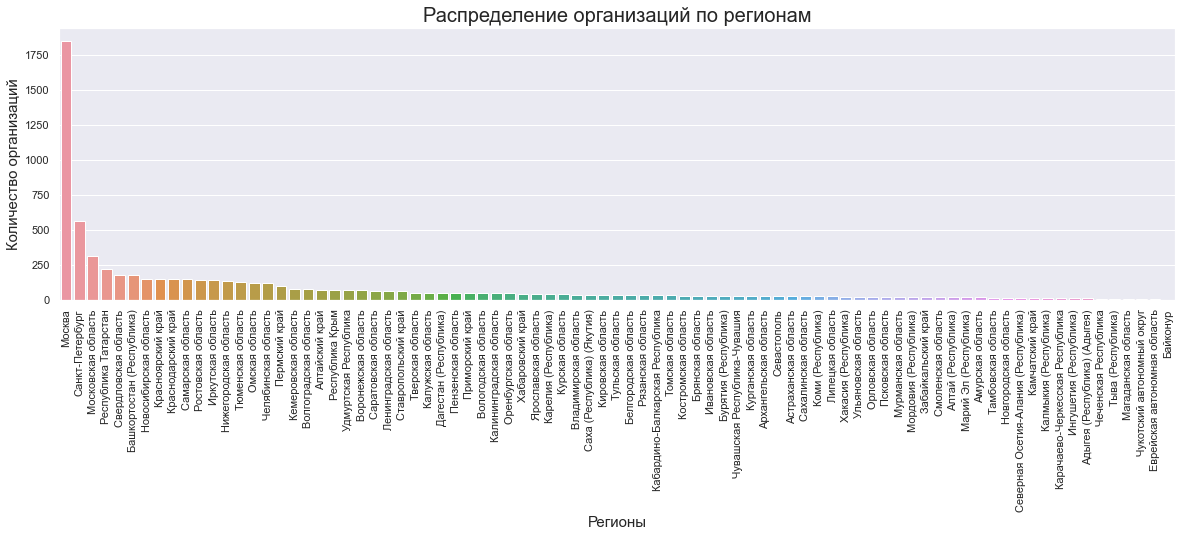

In [ ]:
data1 = pd.DataFrame(d, index=data["Регион регистрации"].value_counts().index).reset_index()
plt.figure(figsize=(20,5))
plt.title('Распределение организаций по регионам', fontsize=FONT_TITLE)
sns.barplot(x='index', y='Количество компаний', data=data1);
plt.ylabel('Количество организаций', fontsize=FONT_LABEL)
plt.xlabel('Регионы', fontsize=FONT_LABEL)
plt.xticks(rotation=90)
plt.show();

В выборке представлено 83 региона. 

1/3 часть организаций зарегистрирована в Москве. По 8% от представленного количества в Санкт-Петербурге и ~5% в МО. Далее по нисходящей. Есть и такие регионы, в которых зарегистрировано всего 2 НКО и 1 НКО В Байконуре. 

##  Статус компаний

,Количество компаний,% компаний
Действующая,6834,99.94
Реорганизуется,2,0.03
Ликвидируется,2,0.03


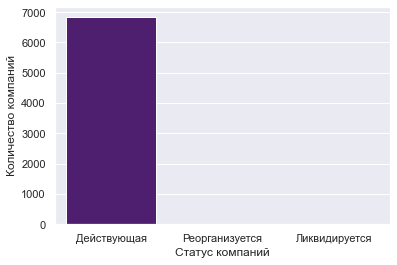

In [ ]:
d = {"Количество компаний": data["Статус"].value_counts(
), "% компаний": data["Статус"].value_counts(normalize=True)*100}
display(pd.DataFrame(d, index=data["Статус"].unique()))
sns.countplot(data=data, x='Статус', palette='magma')
plt.xlabel("Статус компаний")
plt.ylabel("Количество компаний")

In [ ]:
data[data["Статус"]!="Действующая"]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2019, Среднесписочная численность работников","2020, Среднесписочная численность работников","2021, Среднесписочная численность работников","2017, Доходы, RUB","2018, Доходы, RUB","2019, Доходы, RUB","2020, Доходы, RUB","2021, Доходы, RUB","2017, Расходы, RUB","2018, Расходы, RUB","2019, Расходы, RUB","2020, Расходы, RUB","2021, Расходы, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2019, Дебиторская задолженность, RUB","2020, Дебиторская задолженность, RUB","2021, Дебиторская задолженность, RUB","2017, Денежные средства и денежные эквиваленты, RUB","2018, Денежные средства и денежные эквиваленты, RUB","2019, Денежные средства и денежные эквиваленты, RUB","2020, Денежные средства и денежные эквиваленты, RUB","2021, Денежные средства и денежные эквиваленты, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2019, Капитал и резервы, RUB","2020, Капитал и резервы, RUB","2021, Капитал и резервы, RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2019, Заёмные средства (краткосрочные), RUB","2020, Заёмные средства (краткосрочные), RUB","2021, Заёмные средства (краткосрочные), RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2019, Кредиторская задолженность, RUB","2020, Кредиторская задолженность, RUB","2021, Кредиторская задолженность, RUB","2017, Пассивы всего, RUB","2018, Пассивы всего, RUB","2019, Пассивы всего, RUB","2020, Пассивы всего, RUB","2021, Пассивы всего, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2020, Себестоимость продаж, RUB","2021, Себестоимость продаж, RUB","2017, Валовая прибыль (убыток), RUB","2018, Валовая прибыль (убыток), RUB","2019, Валовая прибыль (убыток), RUB","2020, Валовая прибыль (убыток), RUB","2021, Валовая прибыль (убыток), RUB","2017, Коммерческие расходы, RUB","2018, Коммерческие расходы, RUB","2019, Коммерческие расходы, RUB","2020, Коммерческие расходы, RUB","2021, Коммерческие расходы, RUB","2017, Управленческие расходы, RUB","2018, Управленческие расходы, RUB","2019, Управленческие расходы, RUB","2020, Управленческие расходы, RUB","2021, Управленческие расходы, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB","2020, Прибыль (убыток) от продажи, RUB","2021, Прибыль (убыток) от продажи, RUB","2017, Доходы от участия в других организациях, RUB","2018, Доходы от участия в других организациях, RUB","2019, Доходы от участия в других организациях, RUB","2020, Доходы от участия в других организациях, RUB","2021, Доходы от участия в других организациях, RUB","2017, Проценты к получению, RUB","2018, Проценты к получению, RUB","2019, Проценты к получению, RUB","2020, Проценты к получению, RUB","2021, Проценты к получению, RUB","2017, Проценты к уплате, RUB","2018, Проценты к уплате, RUB","2019, Проценты к уплате, RUB","2020, Проценты к уплате, RUB","2021, Проценты к уплате, RUB","2017, Прочие доходы, RUB","2018, Прочие доходы, RUB","2019, Прочие доходы, RUB","2020, Прочие доходы, RUB","2021, Прочие доходы, RUB","2017, Прочие расходы, RUB","2018, Прочие расходы, RUB","2019, Прочие расходы, RUB","2020, Прочие расходы, RUB","2021, Прочие расходы, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB","2017, Текущий налог на прибыль, RUB","2018, Текущий налог н

## Организационно-правовая форма компаний

,Количество компаний,% компаний
Благотворительные фонды,5713,83.55
Общественные фонды,1053,15.40
Фонды,42,0.61
Экологические фонды,26,0.38
Общественные организации,4,0.06


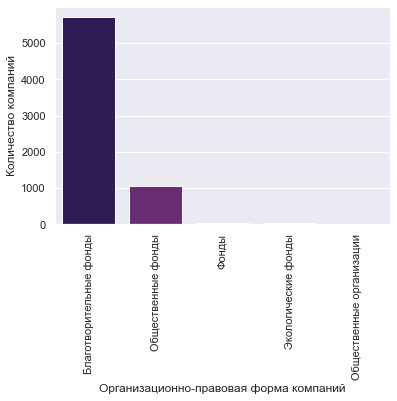

In [ ]:
d = {"Количество компаний": data["Организационно-правовая форма"].value_counts(
), "% компаний": data["Организационно-правовая форма"].value_counts(normalize=True)*100}

display(pd.DataFrame(d, index=data["Организационно-правовая форма"].unique()))
sns.countplot(data=data, x='Организационно-правовая форма', palette='magma')
plt.xlabel("Организационно-правовая форма компаний")
plt.ylabel("Количество компаний")
plt.xticks(rotation=90)

В выборке представлены 5 видов фондов, преимущественно это благотворительный фонды ~84%

## Анализ пропусков в данных

In [ ]:
nan_value = {}
for i in data.columns:
    if data[i].isna().sum() != 0:
        nan_value[i] = data[i].isna().sum()
nan_value

{'2017, Среднесписочная численность работников': 4225,
 '2018, Среднесписочная численность работников': 6784,
 '2019, Среднесписочная численность работников': 6838,
 '2020, Среднесписочная численность работников': 6838,
 '2021, Среднесписочная численность работников': 6838,
 '2017, Доходы, RUB': 6838,
 '2018, Доходы, RUB': 6838,
 '2019, Доходы, RUB': 6838,
 '2020, Доходы, RUB': 6838,
 '2021, Доходы, RUB': 6838,
 '2017, Расходы, RUB': 6838,
 '2018, Расходы, RUB': 6838,
 '2019, Расходы, RUB': 6838,
 '2020, Расходы, RUB': 6838,
 '2021, Расходы, RUB': 6838,
 '2017, Дебиторская задолженность, RUB': 4628,
 '2018, Дебиторская задолженность, RUB': 4378,
 '2019, Дебиторская задолженность, RUB': 4187,
 '2020, Дебиторская задолженность, RUB': 4098,
 '2021, Дебиторская задолженность, RUB': 4108,
 '2017, Денежные средства и денежные эквиваленты, RUB': 3273,
 '2018, Денежные средства и денежные эквиваленты, RUB': 2963,
 '2019, Денежные средства и денежные эквиваленты, RUB': 2672,
 '2020, Денежные ср

*У нас полностью отсутствуют данные по столбцам с доходами и расходами, а также среднесписочной численностью работников за 2019-2021 года оставшихся организаций, удалим эти столбцы*

In [ ]:
print(data.shape)
data.info()
columns_name.append("Год_регистрации")
col = columns_name[13:26]
columns_name = [i for i in columns_name if i not in col]
data = data[columns_name]
print(data.shape)
data.info()

(6838, 162)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6838 entries, 1 to 7524
Columns: 162 entries, Наименование to Год_регистрации
dtypes: datetime64[ns](1), float64(148), int64(6), object(7)
memory usage: 8.8+ MB
(6838, 149)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6838 entries, 1 to 7524
Columns: 149 entries, Наименование to Год_регистрации
dtypes: datetime64[ns](1), float64(135), int64(6), object(7)
memory usage: 8.1+ MB


Возьмем отчетность по каждому году за периоды с 2017 по 2021 по каждой компании и посмотрим есть ли у этих компаний полностью непредставленная отчетность в этих периодах. Если такие компании найдутся, то в данных отчетности оставим пропущенные значения NaN, чтобы не учитывать их при анализе. Если в данных отчетности компании пропущены только какие-то показатели, то заменим пропущенные значения нулем для их дальнейшем обработки.

In [ ]:
otch_col = ['Среднесписочная численность работников', 'Дебиторская задолженность, RUB',\
            'Денежные средства и денежные эквиваленты, RUB', 'Капитал и резервы, RUB',\
            'Заёмные средства (краткосрочные), RUB', 'Кредиторская задолженность, RUB',\
            'Пассивы всего, RUB', 'Выручка, RUB', 'Себестоимость продаж, RUB',\
            'Валовая прибыль (убыток), RUB', 'Коммерческие расходы, RUB',\
            'Управленческие расходы, RUB', 'Прибыль (убыток) от продажи, RUB',\
            'Доходы от участия в других организациях, RUB', 'Проценты к получению, RUB',\
            'Проценты к уплате, RUB', 'Прочие доходы, RUB', 'Прочие расходы, RUB',\
            'Прибыль (убыток) до налогообложения , RUB', 'Текущий налог на прибыль, RUB',\
            'Чистая прибыль (убыток), RUB', 'Прибыль от приносящей доход деятельности, RUB',\
            'Всего поступило средств, RUB', 'Расходы на целевые мероприятия, RUB',\
            'Расходы на содержание аппарата управления, RUB',\
            'Приобретение основных средств, инвентаря и иного имущества, RUB',\
            'Всего использовано средств, RUB', 'Остаток средств на конец отчетного года, RUB']

org_col = ['Наименование', 'Регистрационный номер', 'Год_регистрации', 'Статус',  'Регион регистрации',
           'Код ОКАТО',  'Наименование ОКАТО', 'Код ОКТМО', 'Организационно-правовая форма', 'Код ОКОПФ']

In [ ]:
def report_no(df, year, col):
    k = 0
    col_name = col.copy()
    col_name.remove('Среднесписочная численность работников')
    col = [str(year) +', ' + el for el in col_name]
    df = data[data['Год_регистрации'] <= year][org_col+col]
    print(f'Всего организаций, обязанных сдать отчет в {year} году:', df.shape[0])
    company_bad = []
    for i in range(len(df)):
        if df.iloc[i, 11:].isna().all() == True:
            k += 1
            company_bad.append(df.iloc[i,0])
    if k == 0: return print(f'Все компании отчетность за {year} представили\n ')
    else:
        print(f'{k} компаний не предоставили отчетность за {year}')
    dict_report[year] = [df.shape[0]-k, k]
    return company_bad, dict_report

In [ ]:
dict_report = {}
company_bad = []
for i in range(2017,2022):
    company, dict_report = report_no(data, i, otch_col)
    company_bad.append(company)

Всего организаций, обязанных сдать отчет в 2017 году: 5696
1288 компаний не предоставили отчетность за 2017
Всего организаций, обязанных сдать отчет в 2018 году: 6042
1245 компаний не предоставили отчетность за 2018
Всего организаций, обязанных сдать отчет в 2019 году: 6370
1147 компаний не предоставили отчетность за 2019
Всего организаций, обязанных сдать отчет в 2020 году: 6697
1446 компаний не предоставили отчетность за 2020
Всего организаций, обязанных сдать отчет в 2021 году: 6838
1731 компаний не предоставили отчетность за 2021


In [ ]:
df_fig = pd.DataFrame(dict_report, index=["Сдали отчет", "Не сдали отчет"]).transpose()
df_fig

,Сдали отчет,Не сдали отчет
2017,4408,1288
2018,4797,1245
2019,5223,1147
2020,5251,1446
2021,5107,1731


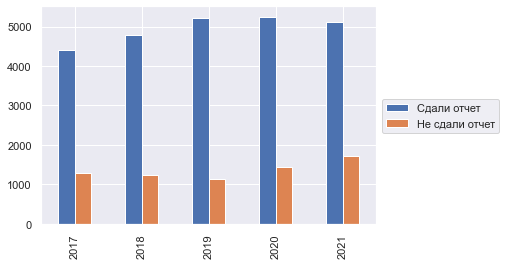

In [ ]:
df_fig[['Сдали отчет', 'Не сдали отчет']].plot(kind='bar')
plt.legend(bbox_to_anchor=(1, 0.6));

Оставшиеся пропуски в финансовой отчетности компаний заменим на ноль

In [ ]:
data.to_csv("data_all.csv", index=False)

In [ ]:
data = pd.read_csv("data_all.csv")

In [ ]:
otch_col = ['Среднесписочная численность работников', 'Дебиторская задолженность, RUB',\
            'Денежные средства и денежные эквиваленты, RUB', 'Капитал и резервы, RUB',\
            'Заёмные средства (краткосрочные), RUB', 'Кредиторская задолженность, RUB',\
            'Пассивы всего, RUB', 'Выручка, RUB', 'Себестоимость продаж, RUB',\
            'Валовая прибыль (убыток), RUB', 'Коммерческие расходы, RUB',\
            'Управленческие расходы, RUB', 'Прибыль (убыток) от продажи, RUB',\
            'Доходы от участия в других организациях, RUB', 'Проценты к получению, RUB',\
            'Проценты к уплате, RUB', 'Прочие доходы, RUB', 'Прочие расходы, RUB',\
            'Прибыль (убыток) до налогообложения , RUB', 'Текущий налог на прибыль, RUB',\
            'Чистая прибыль (убыток), RUB', 'Прибыль от приносящей доход деятельности, RUB',\
            'Всего поступило средств, RUB', 'Расходы на целевые мероприятия, RUB',\
            'Расходы на содержание аппарата управления, RUB',\
            'Приобретение основных средств, инвентаря и иного имущества, RUB',\
            'Всего использовано средств, RUB', 'Остаток средств на конец отчетного года, RUB']

org_col = ['Наименование', 'Регистрационный номер', 'Год_регистрации', 'Статус',  'Регион регистрации',
           'Код ОКАТО',  'Наименование ОКАТО', 'Код ОКТМО', 'Организационно-правовая форма', 'Код ОКОПФ']

In [ ]:
#названия признаков по годам
col_2017 = ['2017, ' + el for el in otch_col]
col_2018 = ['2018, ' + el for el in otch_col]
col_2019 = ['2019, ' + el for el in otch_col]
col_2020 = ['2020, ' + el for el in otch_col]
col_2021 = ['2021, ' + el for el in otch_col]
col_2017_, col_2018_ = col_2017.copy(), col_2018.copy()
col_2017_.remove("2017, Среднесписочная численность работников")
col_2018_.remove("2018, Среднесписочная численность работников")
col_2019.remove("2019, Среднесписочная численность работников")
col_2020.remove("2020, Среднесписочная численность работников")
col_2021.remove("2021, Среднесписочная численность работников")

***В российской отчетности данные предоставляются в тыс.рублях, переведем рубли в тыс.рублей***

In [ ]:
#для удобства анализа переводим суммы в тысячи рублей
for col in col_2017_:
    data[col] = data[col]/1000
    data = data.rename(columns={col: col.replace('RUB','KRUB')})  #перевод в тысячи рублей
col_2017 = [i.replace('RUB','KRUB') for i in col_2017]
for col in col_2018_:
    data[col] = data[col]/1000
    data = data.rename(columns={col: col.replace('RUB','KRUB')})   #перевод в тысячи рублей
col_2018 = [i.replace('RUB','KRUB') for i in col_2018]
for col in col_2019:
    data[col] = data[col]/1000
    data = data.rename(columns={col: col.replace('RUB','KRUB')})   #перевод в тысячи рублей
col_2019 = [i.replace('RUB','KRUB') for i in col_2019]
for col in col_2020:
    data[col] = data[col]/1000
    data = data.rename(columns={col: col.replace('RUB','KRUB')})   #перевод в тысячи рублей
col_2020 = [i.replace('RUB','KRUB') for i in col_2020]
for col in col_2021:
    data[col] = data[col]/1000
    data = data.rename(columns={col: col.replace('RUB','KRUB')})   #перевод в тысячи рублей
col_2021 = [i.replace('RUB','KRUB') for i in col_2021]

In [ ]:
data["2017, Среднесписочная численность работников"].value_counts()

0 - 5        2322
11 - 15       137
6 - 10        105
51 - 100       37
101 - 150       6
151 - 200       4
201 - 250       1
251 - 500       1
Name: 2017, Среднесписочная численность работников, dtype: int64

In [ ]:
data["2018, Среднесписочная численность работников"].value_counts()

51 - 100       41
101 - 150       7
151 - 200       2
201 - 250       2
501 - 1 000     1
251 - 500       1
Name: 2018, Среднесписочная численность работников, dtype: int64

### Модель для предсказания численности сотрудников в 2017 и 2018 годах

In [ ]:
dct = {'0 - 5': 1, '6 - 10': 2, '11 - 15': 3, '16 - 50': 4, '51 - 100': 5,
       '101 - 150': 6, '151 - 200': 7, '201 - 250': 8, '251 - 500': 9, '501 - 1 000': 10}

data['target_2017'] = data["2017, Среднесписочная численность работников"]
data['target_2017'].replace(to_replace=dct, inplace=True)
display(pd.DataFrame(data['target_2017'].value_counts()))  # проверка

,target_2017
1.00,2322
3.00,137
2.00,105
5.00,37
6.00,6
7.00,4
8.00,1
9.00,1


In [ ]:
data['target_2018'] = data["2018, Среднесписочная численность работников"]
data['target_2018'].replace(to_replace=dct, inplace=True)
display(pd.DataFrame(data['target_2018'].value_counts())) # проверка

,target_2018
5.00,41
6.00,7
7.00,2
8.00,2
10.00,1
9.00,1


In [ ]:
col_2017.append('target_2017')
col_2018.append('target_2018')

In [ ]:
data1 = data[col_2017+col_2018+col_2019+col_2020+col_2021].drop(
    ['2017, Среднесписочная численность работников', '2018, Среднесписочная численность работников'], axis=1).copy()

In [ ]:
# данные, которые будем предсказывать
X_test_2017 = data1[data1['target_2017'].isna()].fillna(0).drop('target_2017', axis=1)
X_test_2018 = data1[data1['target_2018'].isna()].fillna(0).drop('target_2018', axis=1)

# Выделим тренировочную части
X_2017 = data1[~data1['target_2017'].isna()].fillna(0).drop('target_2017', axis=1)
y_2017 = data1[~data1['target_2017'].isna()]['target_2017'].astype(int)

X_2018 = data1[~data1['target_2018'].isna()].fillna(0).drop('target_2018', axis=1)
y_2018 = data1[~data1['target_2018'].isna()]['target_2018'].astype(int)

X_test_2017.shape, X_test_2018.shape, X_2017.shape, y_2017.shape, X_2018.shape, y_2018.shape

((4225, 136), (6784, 136), (2613, 136), (2613,), (54, 136), (54,))

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler#, RobustScaler

In [ ]:
# Стандартизация числовых переменных
scaler = StandardScaler()
X_2017_sc = scaler.fit_transform(X_2017)
X_test_2017_sc = scaler.transform(X_test_2017)

X_2018_sc = scaler.fit_transform(X_2018)
X_test_2018_sc = scaler.transform(X_test_2018)

In [ ]:
# Построим модель на дефолтных параметрах
model_2017 = LogisticRegression(
    class_weight='balanced', max_iter=1500, random_state=42)

model_2017.fit(X_2017_sc, y_2017)
predict_2017 = model_2017.predict(X_2017_sc)

print(
    f"Точность модели model_2017 по метрике balanced_accuracy_score:{(balanced_accuracy_score(y_2017, predict_2017))*100:0.2f}%")

model_2018 = LogisticRegression(
    class_weight='balanced', max_iter=1500, random_state=42)

model_2018.fit(X_2018_sc, y_2018)
predict_2018 = model_2017.predict(X_2018_sc)

print(
    f"Точность модели model_2018 по метрике balanced_accuracy_score:{(balanced_accuracy_score(y_2018, predict_2018))*100:0.2f}%")

Точность модели model_2017 по метрике balanced_accuracy_score:84.48%
Точность модели model_2018 по метрике balanced_accuracy_score:2.44%


C:\Users\Ludmila\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


***Для предсказания среднесписочной численности сотрудников в 2018 году совсем мало данных, поэтому предскажем хотя бы для 2017 года***

In [ ]:
predict_2017 = model_2017.predict(X_test_2017_sc)
predict_2017

array([2, 1, 1, ..., 1, 1, 1])

In [ ]:
data.loc[:, 'target_2017'][data['target_2017'].isna()] = predict_2017
data.loc[:, 'target_2017'] = data['target_2017'].apply(int)

<ipython-input-47-3fae2902a48f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'target_2017'][data['target_2017'].isna()] = predict_2017


In [ ]:
dct_revers = {v:k for k, v in dct.items()}
data["2017, СЧР_предсказанная"] = data['target_2017']
data["2017, СЧР_предсказанная"].replace(to_replace=dct_revers, inplace=True)
display(pd.DataFrame(data["2017, СЧР_предсказанная"].value_counts())) # проверка

,"2017, СЧР_предсказанная"
0 - 5,6269
11 - 15,238
6 - 10,227
51 - 100,80
101 - 150,9
201 - 250,7
151 - 200,7
251 - 500,1


In [ ]:
data["2017, СЧР_предсказанная"].unique()

array(['6 - 10', '0 - 5', '11 - 15', '51 - 100', '201 - 250', '101 - 150',
       '151 - 200', '251 - 500'], dtype=object)

Численность работников представлена в виде диапазона, границы диапазона не пересекаются между собой. Поэтому можно использовать только верхнюю границу диапазона. Заменим диапазоны на максимальное значение и впоследствии будем интерпретировать как "численность сотрудников организации - до 5, до 10 и т.д."

In [ ]:
data['2017, СЧР макс'] = data['2017, Среднесписочная численность работников'].apply(lambda x:  x if pd.isna(x) else int(
    x.replace(' ', '').split('-')[1]))                 # 1000 записано в виде '1 000', поэтому сначала удаляем пробелы
data['2017, СЧР_пред макс'] = data['2017, СЧР_предсказанная'].apply(lambda x:  x if pd.isna(x) else int(
    x.replace(' ', '').split('-')[1]))                 # 1000 записано в виде '1 000', поэтому сначала удаляем пробелы
data['2018, СЧР макс'] = data['2018, Среднесписочная численность работников'].apply(
    lambda x:  x if pd.isna(x) else int(x.replace(' ', '').split('-')[1]))

In [ ]:
col_2017.append('2017, СЧР макс')
col_2017.append('2017, СЧР_предсказанная')
col_2017.append('2017, СЧР_пред макс')
col_2018.append('2018, СЧР макс')

In [ ]:
data[col_2017+col_2018+col_2019+col_2020+col_2021].describe()

,"2017, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2017, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2017, Прибыль от приносящей доход деятельности, KRUB","2017, Всего поступило средств, KRUB","2017, Расходы на целевые мероприятия, KRUB","2017, Расходы на содержание аппарата управления, KRUB","2017, Приобретение основных средств, инвентаря и иного имущества, KRUB","2017, Всего использовано средств, KRUB","2017, Остаток средств на конец отчетного года, KRUB",target_2017,"2017, СЧР макс","2017, СЧР_пред макс","2018, Дебиторская задолженность, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2018, Капитал и резервы, KRUB","2018, Заёмные средства (краткосрочные), KRUB","2018, Кредиторская задолженность, KRUB","2018, Пассивы всего, KRUB","2018, Выручка, KRUB","2018, Себестоимость продаж, KRUB","2018, Валовая прибыль (убыток), KRUB","2018, Коммерческие расходы, KRUB","2018, Управленческие расходы, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2018, Доходы от участия в других организациях, KRUB","2018, Проценты к получению, KRUB","2018, Проценты к уплате, KRUB","2018, Прочие доходы, KRUB","2018, Прочие расходы, KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2018, Текущий налог на прибыль, KRUB","2018, Чистая прибыль (убыток), KRUB","2018, Прибыль от приносящей доход деятельности, KRUB","2018, Всего поступило средств, KRUB","2018, Расходы на целевые мероприятия, KRUB","2018, Расходы на содержание аппарата управления, KRUB","2018, Приобретение основных средств, инвентаря и иного имущества, KRUB","2018, Всего использовано средств, KRUB","2018, Остаток средств на конец отчетного года, KRUB",target_2018,"2018, СЧР макс","2019, Дебиторская задолженность, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2019, Капитал и резервы, KRUB","2019, Заёмные средства (краткосрочные), KRUB","2019, Кредиторская задолженность, KRUB","2019, Пассивы всего, KRUB","2019, Выручка, KRUB","2019, Себестоимость продаж, KRUB","2019, Валовая прибыль (убыток), KRUB","2019, Коммерческие расходы, KRUB","2019, Управленческие расходы, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2019, Доходы от участия в других организациях, KRUB","2019, Проценты к получению, KRUB","2019, Проценты к уплате, KRUB","2019, Прочие доходы, KRUB","2019, Прочие расходы, KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2019, Текущий налог на прибыль, KRUB","2019, Чистая прибыль (убыток), KRUB","2019, Прибыль от приносящей доход деятельности, KRUB","2019, Всего поступило средств, KRUB","2019, Расходы на целевые мероприятия, KRUB","2019, Расходы на содержание аппарата управления, KRUB","2019, Приобретение основных средств, инвентаря и иного имущества, KRUB","2019, Всего использовано средств, KRUB","2019, Остаток средств на конец отчетного года, KRUB","2020, Дебиторская задолженность, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2020, Капитал и резервы, KRUB","2020, Заёмные средства (краткосрочные), KRUB","2020, Кредиторская задолженность, KRUB","2020, Пассивы всего, KRUB","2020, Выручка, KRUB","2020, Себестоимость продаж, KRUB","2020, Валовая прибыль (убыток), KRUB","2020, Коммерческие расходы, KRUB","2020, Управленческие расходы, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2020, Доходы от участия в других организациях, KRUB","2020, Проценты к получению, KRUB","2020, Процент

Отчетность по некоторым компаниям составлена некорректно, есть отрицательные значения в тех показателях где они отрицательными в принципе не могут быть. Посмотрим на статьи отчетности, в которых есть эти неправильные значения и удалим эти компании из анализа ввиду некорретности их отчетности

***Дебиторская задолженность***

In [ ]:
mask = data[(data["2017, Дебиторская задолженность, KRUB"] < 0) | (data["2018, Дебиторская задолженность, KRUB"] < 0) |\
     (data["2019, Дебиторская задолженность, KRUB"] < 0) | (data["2020, Дебиторская задолженность, KRUB"] < 0) |\
     (data["2021, Дебиторская задолженность, KRUB"] < 0)]
display(mask)
print(len(mask))

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

8


In [ ]:
data.drop(mask.index, axis=0, inplace=True)

***Денежные средства и денежные эквиваленты***

In [ ]:
mask = data[(data["2017, Денежные средства и денежные эквиваленты, KRUB"] < 0) |\
            (data["2018, Денежные средства и денежные эквиваленты, KRUB"] < 0) |\
     (data["2019, Денежные средства и денежные эквиваленты, KRUB"] < 0) |\
            (data["2020, Денежные средства и денежные эквиваленты, KRUB"] < 0) |\
     (data["2021, Денежные средства и денежные эквиваленты, KRUB"] < 0)]
display(mask)
print(len(mask))

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

15


In [ ]:
data.drop(mask.index, axis=0, inplace=True)

***Заёмные средства (краткосрочные), KRUB***

In [ ]:
mask = data[(data["2017, Заёмные средства (краткосрочные), KRUB"] < 0) |\
            (data["2018, Заёмные средства (краткосрочные), KRUB"] < 0) |\
     (data["2019, Заёмные средства (краткосрочные), KRUB"] < 0) |\
            (data["2020, Заёмные средства (краткосрочные), KRUB"] < 0) |\
     (data["2021, Заёмные средства (краткосрочные), KRUB"] < 0)]
display(mask)
print(len(mask))

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

14


In [ ]:
data.drop(mask.index, axis=0, inplace=True)

***Кредиторская задолженность, KRUB***

In [ ]:
mask = data[(data["2017, Кредиторская задолженность, KRUB"] < 0) | (data["2018, Кредиторская задолженность, KRUB"] < 0) |\
     (data["2019, Кредиторская задолженность, KRUB"] < 0) | (data["2020, Кредиторская задолженность, KRUB"] < 0) |\
     (data["2021, Кредиторская задолженность, KRUB"] < 0)]
display(mask)
print(len(mask))

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

18


In [ ]:
data.drop(mask.index, axis=0, inplace=True)

***Пассивы всего, KRUB***

In [ ]:
mask = data[(data["2017, Пассивы всего, KRUB"] < 0) | (data["2018, Пассивы всего, KRUB"] < 0) |\
     (data["2019, Пассивы всего, KRUB"] < 0) | (data["2020, Пассивы всего, KRUB"] < 0) |\
     (data["2021, Пассивы всего, KRUB"] < 0)]
display(mask)
print(len(mask))

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

1


In [ ]:
data.drop(mask.index, axis=0, inplace=True)

***Проценты к получению, KRUB***

In [ ]:
mask = data[(data["2017, Проценты к получению, KRUB"] < 0) | (data["2018, Проценты к получению, KRUB"] < 0) |\
     (data["2019, Проценты к получению, KRUB"] < 0) | (data["2020, Проценты к получению, KRUB"] < 0) |\
     (data["2021, Проценты к получению, KRUB"] < 0)]
display(mask)
print(len(mask))

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

1


Посмотрим на эту компанию повнимательней, у нее только в 2021 по процентам к получению отрицательное значение, возможно опечатка?

In [ ]:
data.loc[990,col_2021]

2021, Дебиторская задолженность, KRUB                                    11689.00
2021, Денежные средства и денежные эквиваленты, KRUB                     40486.00
2021, Капитал и резервы, KRUB                                            61025.00
2021, Заёмные средства (краткосрочные), KRUB                                  NaN
2021, Кредиторская задолженность, KRUB                                    2760.00
2021, Пассивы всего, KRUB                                                66452.00
2021, Выручка, KRUB                                                      99445.00
2021, Себестоимость продаж, KRUB                                         14978.00
2021, Валовая прибыль (убыток), KRUB                                     84467.00
2021, Коммерческие расходы, KRUB                                              NaN
2021, Управленческие расходы, KRUB                                            NaN
2021, Прибыль (убыток) от продажи, KRUB                                  84467.00
2021, Доходы от 

Нет, это не опечатка, возможно неправильное заполнение Формы №2. Но пока не будет эту компанию удалять из анализа

***Прочие доходы, KRUB***

In [ ]:
mask = data[(data["2017, Прочие доходы, KRUB"] < 0) | (data["2018, Прочие доходы, KRUB"] < 0) |\
     (data["2019, Прочие доходы, KRUB"] < 0) | (data["2020, Прочие доходы, KRUB"] < 0) |\
     (data["2021, Прочие доходы, KRUB"] < 0)]
display(mask)
print(len(mask))

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

5


In [ ]:
data.drop(mask.index, axis=0, inplace=True)

***Всего поступило средств, KRUB***

In [ ]:
mask = data[(data["2017, Всего поступило средств, KRUB"] < 0) | (data["2018, Всего поступило средств, KRUB"] < 0) |\
     (data["2019, Всего поступило средств, KRUB"] < 0) | (data["2020, Всего поступило средств, KRUB"] < 0) |\
     (data["2021, Всего поступило средств, KRUB"] < 0)]
display(mask)
print(len(mask))

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

9


In [ ]:
data.drop(mask.index, axis=0, inplace=True)

***Всего использовано средств, KRUB***

In [ ]:
mask = data[(data["2017, Всего использовано средств, KRUB"] < 0) | (data["2018, Всего использовано средств, KRUB"] < 0) |\
     (data["2019, Всего использовано средств, KRUB"] < 0) | (data["2020, Всего использовано средств, KRUB"] < 0) |\
     (data["2021, Всего использовано средств, KRUB"] < 0)]
display(mask)
print(len(mask))

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

112


In [ ]:
data.drop(mask.index, axis=0, inplace=True)

***Прибыль от приносящей доход деятельности, KRUB***

In [ ]:
mask = data[(data["2017, Прибыль от приносящей доход деятельности, KRUB"] < 0) |\
            (data["2018, Прибыль от приносящей доход деятельности, KRUB"] < 0) |\
     (data["2019, Прибыль от приносящей доход деятельности, KRUB"] < 0) |\
            (data["2020, Прибыль от приносящей доход деятельности, KRUB"] < 0) |\
     (data["2021, Прибыль от приносящей доход деятельности, KRUB"] < 0)]
display(mask)
print(len(mask))

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

20


In [ ]:
data.drop(mask.index, axis=0, inplace=True)

***Остаток средств на конец отчетного года, KRUB***

In [ ]:
mask = data[(data["2017, Остаток средств на конец отчетного года, KRUB"] < 0) |\
            (data["2018, Остаток средств на конец отчетного года, KRUB"] < 0) |\
     (data["2019, Остаток средств на конец отчетного года, KRUB"] < 0) |\
            (data["2020, Остаток средств на конец отчетного года, KRUB"] < 0) |\
     (data["2021, Остаток средств на конец отчетного года, KRUB"] < 0)]
display(mask)
print(len(mask))

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

346


In [ ]:
data.drop(mask.index, axis=0, inplace=True)

In [ ]:
data[col_2017+col_2018+col_2019+col_2020+col_2021].describe()

,"2017, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2017, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2017, Прибыль от приносящей доход деятельности, KRUB","2017, Всего поступило средств, KRUB","2017, Расходы на целевые мероприятия, KRUB","2017, Расходы на содержание аппарата управления, KRUB","2017, Приобретение основных средств, инвентаря и иного имущества, KRUB","2017, Всего использовано средств, KRUB","2017, Остаток средств на конец отчетного года, KRUB",target_2017,"2017, СЧР макс","2017, СЧР_пред макс","2018, Дебиторская задолженность, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2018, Капитал и резервы, KRUB","2018, Заёмные средства (краткосрочные), KRUB","2018, Кредиторская задолженность, KRUB","2018, Пассивы всего, KRUB","2018, Выручка, KRUB","2018, Себестоимость продаж, KRUB","2018, Валовая прибыль (убыток), KRUB","2018, Коммерческие расходы, KRUB","2018, Управленческие расходы, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2018, Доходы от участия в других организациях, KRUB","2018, Проценты к получению, KRUB","2018, Проценты к уплате, KRUB","2018, Прочие доходы, KRUB","2018, Прочие расходы, KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2018, Текущий налог на прибыль, KRUB","2018, Чистая прибыль (убыток), KRUB","2018, Прибыль от приносящей доход деятельности, KRUB","2018, Всего поступило средств, KRUB","2018, Расходы на целевые мероприятия, KRUB","2018, Расходы на содержание аппарата управления, KRUB","2018, Приобретение основных средств, инвентаря и иного имущества, KRUB","2018, Всего использовано средств, KRUB","2018, Остаток средств на конец отчетного года, KRUB",target_2018,"2018, СЧР макс","2019, Дебиторская задолженность, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2019, Капитал и резервы, KRUB","2019, Заёмные средства (краткосрочные), KRUB","2019, Кредиторская задолженность, KRUB","2019, Пассивы всего, KRUB","2019, Выручка, KRUB","2019, Себестоимость продаж, KRUB","2019, Валовая прибыль (убыток), KRUB","2019, Коммерческие расходы, KRUB","2019, Управленческие расходы, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2019, Доходы от участия в других организациях, KRUB","2019, Проценты к получению, KRUB","2019, Проценты к уплате, KRUB","2019, Прочие доходы, KRUB","2019, Прочие расходы, KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2019, Текущий налог на прибыль, KRUB","2019, Чистая прибыль (убыток), KRUB","2019, Прибыль от приносящей доход деятельности, KRUB","2019, Всего поступило средств, KRUB","2019, Расходы на целевые мероприятия, KRUB","2019, Расходы на содержание аппарата управления, KRUB","2019, Приобретение основных средств, инвентаря и иного имущества, KRUB","2019, Всего использовано средств, KRUB","2019, Остаток средств на конец отчетного года, KRUB","2020, Дебиторская задолженность, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2020, Капитал и резервы, KRUB","2020, Заёмные средства (краткосрочные), KRUB","2020, Кредиторская задолженность, KRUB","2020, Пассивы всего, KRUB","2020, Выручка, KRUB","2020, Себестоимость продаж, KRUB","2020, Валовая прибыль (убыток), KRUB","2020, Коммерческие расходы, KRUB","2020, Управленческие расходы, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2020, Доходы от участия в других организациях, KRUB","2020, Проценты к получению, KRUB","2020, Процент

С отрицательными значениями остались показатели `"Капитал и резервы"` и `"Текущий налог на прибыль"`. Капитал и резервы в балансе компании могут быть отрицательными при убыточности организации, поэтому эти компании удалять не будем. Текущий налог на прибыль нас пока мало интересует и с минусом он возможно из-за неправильного заполнения отчета о прибылях и убытках, тоже оставим, не будем удалять.     

Всего мы удалили из `6838` компаний из-за некорректности показателей в отчетности `548` компаний и у нас для анализа оставлено `6290` компаний

In [ ]:
data.shape

(6290, 155)

In [ ]:
# for i in [col_2017, col_2018, col_2019, col_2020, col_2021]:
#     display(data[data["Наименование"] == "АРТЭС, КБФ"][org_col+i])

In [ ]:
# for i in [col_2017, col_2018, col_2019, col_2020, col_2021]:
#     display(data[data["Наименование"] == "САПСАН, РОФ"][org_col+i])

Кроме устранения вышеперечисленных грубых ошибок в отчетности показатели в отчетности компаний некорректны из-за неправильного их составления во всех формах по некоторым организациям, т.к. содержат пропуски в данных и не соблюдается баланс и стыковка показателей друг с другом.   
Это будет является причиной некорректного расчета показателей финансово-экономической деятельности для дальнейшего анализа. Для устранения этой ошибки сделаем проверку корректности заполнения тех показателей отчетности, в которых пропущены значения, однако этот способ без более детального рассмотрения некорректной отчетности является чисто техническим и поверхностным и возможно не даст должного эффекта и правильного заполнения пропущенных данных в отчетности.

In [ ]:
data = data.reset_index(drop=True)
data = data.fillna(0)

In [ ]:
for i in range(2017,2022):
    for j in range(data.shape[0]):
# 1. Бухгалтерский баланс
        if (data.loc[j, str(i)+", Капитал и резервы, KRUB"] == 0).any() & (data.loc[j, str(i)+", Пассивы всего, KRUB"] != 0).any():
            data.loc[j, str(i)+", Капитал и резервы, KRUB"] = data.loc[j, str(i)+", Пассивы всего, KRUB"] -\
                                                              data.loc[j, str(i)+", Заёмные средства (краткосрочные), KRUB"] -\
                                                              data.loc[j, str(i)+", Кредиторская задолженность, KRUB"]
# 2. Форма №2 Отчет о прибылях и убытках
        if (data.loc[j, str(i)+", Валовая прибыль (убыток), KRUB"] == 0).any() & (data.loc[j, str(i)+", Выручка, KRUB"] != 0).any():
            data.loc[j, str(i)+", Валовая прибыль (убыток), KRUB"] = data.loc[j, str(i)+", Выручка, KRUB"] -\
                                                                     data.loc[j, str(i)+", Себестоимость продаж, KRUB"] 
        if (data.loc[j, str(i)+", Прибыль (убыток) от продажи, KRUB"] == 0).any() &\
           ((data.loc[j, str(i)+", Валовая прибыль (убыток), KRUB"] != 0).any() | (data.loc[j, str(i)+", Коммерческие расходы, KRUB"] != 0).any() |\
           (data.loc[j, str(i)+", Управленческие расходы, KRUB"] != 0).any()):
            data.loc[j, str(i)+", Прибыль (убыток) от продажи, KRUB"] = data.loc[j, str(i)+", Валовая прибыль (убыток), KRUB"] -\
                                                                        data.loc[j, str(i)+", Коммерческие расходы, KRUB"] -\
                                                                        data.loc[j, str(i)+", Управленческие расходы, KRUB"]
    
        if (data.loc[j, str(i)+", Прибыль (убыток) до налогообложения , KRUB"] == 0).any() & (data.loc[j, str(i)+", Прибыль (убыток) от продажи, KRUB"] != 0).any():
            data.loc[j, str(i)+", Прибыль (убыток) до налогообложения , KRUB"] = data.loc[j, str(i)+", Прибыль (убыток) от продажи, KRUB"] +\
                                                                                 data.loc[j, str(i)+", Доходы от участия в других организациях, KRUB"] +\
                                                                                 data.loc[j, str(i)+", Проценты к получению, KRUB"] -\
                                                                                 data.loc[j, str(i)+", Проценты к уплате, KRUB"] +\
                                                                                 data.loc[j, str(i)+", Прочие доходы, KRUB"] -\
                                                                                 data.loc[j, str(i)+", Прочие расходы, KRUB"]
        if (data.loc[j, str(i)+", Чистая прибыль (убыток), KRUB"] == 0).any() & (data.loc[j, str(i)+", Прибыль (убыток) до налогообложения , KRUB"] != 0).any():
            data.loc[j, str(i)+", Чистая прибыль (убыток), KRUB"] = data.loc[j, str(i)+", Прибыль (убыток) до налогообложения , KRUB"] -\
                                                                    data.loc[j, str(i)+", Текущий налог на прибыль, KRUB"]     
        
# 4. Форма №3 Отчет о целевом использовании средств
        if (data.loc[j, str(i)+", Прибыль от приносящей доход деятельности, KRUB"] == 0).any() & (data.loc[j, str(i)+", Чистая прибыль (убыток), KRUB"] > 0).any():
            data.loc[j, str(i)+", Прибыль от приносящей доход деятельности, KRUB"] = data.loc[j, str(i)+", Чистая прибыль (убыток), KRUB"]
        
# добавим столбец с целевыми поступлениями, который будет обощать целевые поступления, за неимением другой информации в разрезе статьей по поступлениям
    data[str(i)+", Целевые поступления, KRUB"] = data[str(i)+", Всего поступило средств, KRUB"] - data[str(i)+", Прибыль от приносящей доход деятельности, KRUB"]


In [ ]:
# for i in range(2017,2022):
# # добавим столбец с целевыми поступлениями, который будет обощать целевые поступления, за неимением другой информации в разрезе статьей по поступлениям
#     data[str(i)+", Целевые поступления, KRUB"] = data[str(i)+", Всего поступило средств, KRUB"] - data[str(i)+", Прибыль от приносящей доход деятельности, KRUB"]   

In [ ]:
col_2017.append('2017, Целевые поступления, KRUB')
col_2018.append('2018, Целевые поступления, KRUB')
col_2019.append('2019, Целевые поступления, KRUB')
col_2020.append('2020, Целевые поступления, KRUB')
col_2021.append('2021, Целевые поступления, KRUB')

## Расчет показателей финансовой эфффективности

Показатели финансовой эффективности позволяют выявлять те фонды, которые направляют большую долю ресурсов непосредственно на выполнение своей
миссии, минимизируя расходы на поддержание деятельности фонда (персонал,
банковское обслуживание, расходы на содержание офиса) и фандрайзинговую
активность. Важным представляется также низкая доля фандрайзинговых расходов по отношению к привлеченным средствам. Естественно, что рассчитанные
показатели соотносятся с типом фонда и спецификой его деятельности.

In [ ]:
# усредненная доля расходов на целевые мероприятия (Average Program Expense Percentage-APEP)
data["APEP"] = data.apply(lambda x: sum([x[str(i)+", Расходы на целевые мероприятия, KRUB"] for i in range(2017,2022)])*100/\
                                    sum([x[str(i)+", Всего использовано средств, KRUB"] for i in range(2017,2022)])\
                          if sum([x[str(i)+", Всего использовано средств, KRUB"] for i in range(2017,2022)]) !=0 else 0, axis=1)
# усредненная доля АХР (Average Administraive Expense Percentage-AAEP)
data["AAEP"] = data.apply(lambda x: sum([x[str(i)+", Расходы на содержание аппарата управления, KRUB"] for i in range(2017,2022)])*100/\
                                    sum([x[str(i)+", Всего использовано средств, KRUB"] for i in range(2017,2022)])\
                          if sum([x[str(i)+", Всего использовано средств, KRUB"] for i in range(2017,2022)]) !=0 else 0, axis=1)


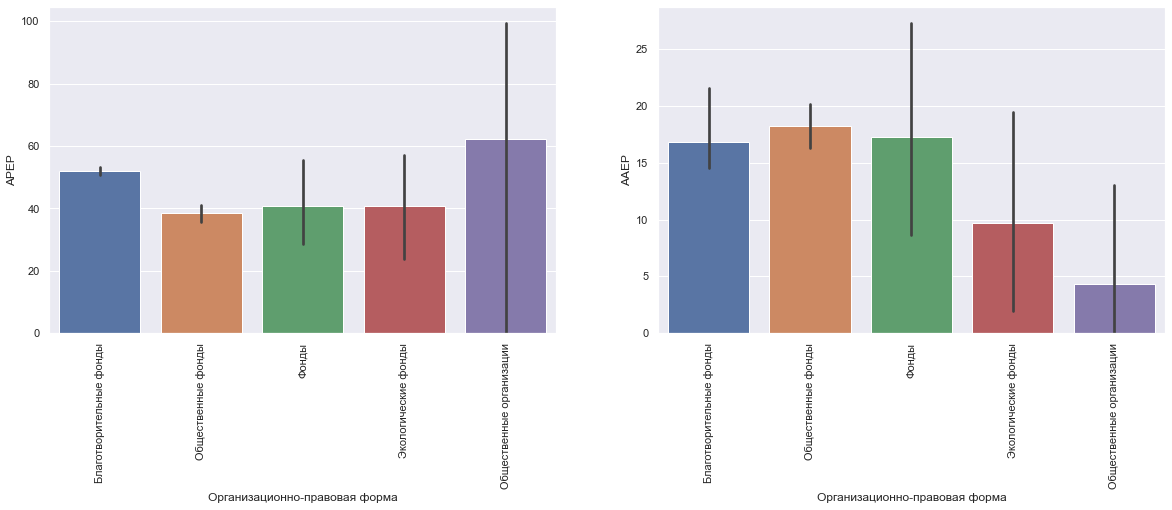

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,6))
for i in range(2):
    axes[i].xaxis.set_tick_params(rotation=90)
#from numpy import median
sns.barplot(data=data, y="APEP", x="Организационно-правовая форма", ax=axes[0]);
sns.barplot(data=data, y="AAEP", x="Организационно-правовая форма", ax=axes[1]);

**Вывод:** Наиболее расточительны на собственные нужды ***фонды*** и ***общественные фонды*** показатель усредненной доли АХР `AAEP`. В первую очередь ***общественные организации*** наиболее эффективно выполняют свою миссию, направляя денежные средства на целевые мероприятия, показатель усредненной доля расходов на целевые мероприятия `APEP`

In [ ]:
data.to_csv("data/data_prepare.csv", index=False)

Кластеризация и дальнейший анализ проведен в ноутбуке `Анализ_данных.ipynb`